# Surprise 패키지 사용
- CF와 MF 기반 추천 시스템을 구현하고 테스트해볼 수 있는 패키지가 존재하며, 현재 가장 널리 알려진 것으로는 Surprise가 있다. 
- Surprise는 scikit 패키지의 일부로서 다양한 CF, MF 기반 알고리즘을 테스트해 볼수 있으는 유용한 패키지 이다

- Surprise에는 추천 시스템 테스트를 위한 많은 기능이 있다. 우선 기본적으로 ml-100k, ml-lm, jester 이렇게 3가지 데이터가 내장되어 있다. 이중에서 Ml-100k는 moiveLens 100K 데이터 이고, ml-1m은 movieLens-1m(100만개) 데이터, jester는 미국의 버클리 대학교에서 추천 시스템 연구 목적으로 수집한 조크 사이트의 게시물(조크나 재미있는 이야기)에 대한 650만개의 평가 데이터 이다

### Surprise의 다양한 종류의 알고리즘 

1. random_pred.NormalPredictor 
    - Training set의 분포가 정규분포라고 가정한 상태에서 평점을 무작위로 추출하는 알고리즘. 일반적으로 성능이 안좋음
2. baseline_only.BaselineOnly
    - 사용자의 평점 평균과 아이템의 평점 평균을 모델화해서 예측하는 알고리즘
3. knns.KNNBasic 
    - 이웃을 고려한 기본적인 CF 알고리즘
4. knns.KNNWithMeans
    - 사용자의 평가 경향을 고려한 CF 알고리즘
5. knns.KNNWithZScore
    - 사용자의 평가 경향을 표준(정규 분포)화시킨 CF 알고리즘
6. knns.KNNBaseline
    - 사용자의 평점 평균과 아이템의 평점 평균을 모델화시킨 것(Baseline rating)을 고려한 CF 알고리즘
7. matrix_factorizaion.SBD
    - MF 알고리즘
8. matrix_factorizaion.SVDpp
    - MF 기반으로 사용자의 특정 아이템에 대한 평가여부를 이진값으로 일종의 암묵적 평가로 추가한 SVD++ 알고리즘
9. matrix_factorizaion.NMF
    - 행렬의 값이 전부 양수일 때 사용 가능한 MF 알고리즘
10. slope_one.SlopeOne
    - 간단하면서도 정확도가 높은 것이 특징인 slopeOne알고리즘을 적용한 Item-based CF 알고리즘
11. co_clustering.CoClustering
    - 사용자와 아이템을 동시에 클러스터링하는 기법을 적용한 CF 알고리즘 

In [1]:
# pip install scikit-surprise
# conda install -c conda-forge scikit-surprise
# ModuleNotFoundError: No module named 'surprise'

In [2]:
import numpy as np
import pandas as pd

# 필요한 Surprise 알고리즘 불러오기
from surprise import BaselineOnly 
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

In [3]:
# MovieLens 100K 데이터 불러오기
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [4]:
# Train/Test 분리 
trainset, testset = train_test_split(data, test_size=0.25) # 0.75 / 0.25

In [5]:
# 정확도 계산 
algo = KNNWithMeans()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9553


0.9552647920824257

### 알고리즘 비교

Estimating biases using als...
RMSE: 0.9453
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9553
RMSE: 0.9433
RMSE: 0.9253


array([0.92532487, 0.94330014, 0.94527405, 0.95526479])

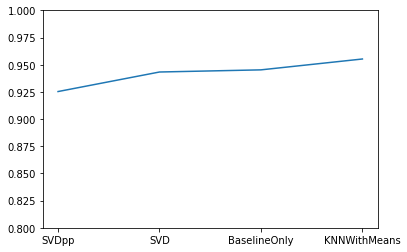

In [6]:
# 알고리즘 비교
algorithms = [BaselineOnly, KNNWithMeans, SVD, SVDpp] # 4개의 알고리즘 이름을 지정
names = []
results = []
for option in algorithms:
    algo = option()  
    names.append(option.__name__)       # 알고리즘 이름, __name__은 option 의 속성으로서 알고리즘 이름을 저장하고 있다. 
    algo.fit(trainset)
    predictions = algo.test(testset)
    results.append(accuracy.rmse(predictions))
names = np.array(names) #  그래프를 작성하기 위해서 array 형식으로 변경 
results = np.array(results) #  그래프를 작성하기 위해서 array 형식으로 변경 

# 결과를 그래프로 표시
import matplotlib.pyplot as plt
index = np.argsort(results) # 정확도의 순서대로 정렬한 인덱스를 받아온다 
plt.ylim(0.8, 1)
plt.plot(names[index], results[index])
results[index]

### 알고리즘 옵션 지정

In [7]:
# 알고리즘 옵션 변경, 정확도 계산
sim_options = {'name': 'pearson_baseline',
               'user_based': True}
'''
알고리즘과 정확도 게산 옵션을 dict 형식으로 지정한다. 옵션은 알고리즘의 종류에 따라 조금씩 차이가 있는데
KNN의 경우 'name'에 유사도 지표의 종류를 지정한다 
유사도 종류에는 cosine, msd, pearson, pearson_baseline이 있다
user_based가 True 이므로 user-based CF(UBCF) 알고리즘을 사용한다. False 일 경우는 Item-Based CF(IBCF)알고리즘 사용
'''
algo = KNNWithMeans(k=30, sim_options=sim_options) # 이웃의 크기를 30으로 하고, 지정한 sim_option으로 지정한 옵션을 사용 
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9447


0.9447027379076272